In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [ ]:
spark = SparkSession.builder.appName("FootballData").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = spark.read.csv("/content/drive/MyDrive/Fbref/GER-Bundesliga/*.csv", header=True, inferSchema=True)
df2 = spark.read.csv("/content/drive/MyDrive/Fbref/ENG-Premier League/*.csv", header=True, inferSchema=True)
df3 = spark.read.csv("/content/drive/MyDrive/Fbref/ESP-La Liga/*.csv", header=True, inferSchema=True)
df4 = spark.read.csv("/content/drive/MyDrive/Fbref/FRA-Ligue 1/*.csv", header=True, inferSchema=True)
df5 = spark.read.csv("/content/drive/MyDrive/Fbref/ITA-Serie A/*.csv", header=True, inferSchema=True)

In [ ]:
# Select the desired columns from both DataFrames
df4_s = df4.select("league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp", "Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int")
df5_s = df5.select("league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int")

# Perform the join using the specified columns
merged_df_1 = df4_s.join(df5_s, on=["league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int"], how="outer")

# Display the merged DataFrame
merged_df_1.show()

+-----------+------+----------+-----------+-----+------+---+---+-----------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+--------+-----------+-------------+----+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+---------------+
|     league|season|      date|       Team|venue|result| GF| GA|   opponent|Standard Gls|Standard Sh|Standard SoT|Standard SoT%|Standard G/Sh|Standard G/SoT|Standard Dist|Standard PK|Standard PKatt|Short Cmp|Medium Cmp|Long Cmp|Tackles Tkl|Blocks Blocks|Poss|Performance CrdY|Performance CrdR|Performance 2CrdY|Performance Fls|Performance Fld|Performance Off|Performance Crs|Performance Int|
+-----------+------+----------+-----------+-----+------+---+---+-----------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+--------

In [ ]:
df4_s.show()

+-----------+------+----------+------+-----+------+---+---+-------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+--------+-----------+-------------+----+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+---------------+
|     league|season|      date|  Team|venue|result| GF| GA|     opponent|Standard Gls|Standard Sh|Standard SoT|Standard SoT%|Standard G/Sh|Standard G/SoT|Standard Dist|Standard PK|Standard PKatt|Short Cmp|Medium Cmp|Long Cmp|Tackles Tkl|Blocks Blocks|Poss|Performance CrdY|Performance CrdR|Performance 2CrdY|Performance Fls|Performance Fld|Performance Off|Performance Crs|Performance Int|
+-----------+------+----------+------+-----+------+---+---+-------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+------

In [ ]:
df1_s = df1.select("league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int")
df2_s = df2.select("league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int")

merged_df_2 = df1_s.join(df2_s, on=["league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int"], how="outer")

merged_df_2.show()

+--------------+------+----------+---------------+-----+------+---+---+---------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+--------+-----------+-------------+----+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+---------------+
|        league|season|      date|           Team|venue|result| GF| GA|       opponent|Standard Gls|Standard Sh|Standard SoT|Standard SoT%|Standard G/Sh|Standard G/SoT|Standard Dist|Standard PK|Standard PKatt|Short Cmp|Medium Cmp|Long Cmp|Tackles Tkl|Blocks Blocks|Poss|Performance CrdY|Performance CrdR|Performance 2CrdY|Performance Fls|Performance Fld|Performance Off|Performance Crs|Performance Int|
+--------------+------+----------+---------------+-----+------+---+---+---------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+

In [ ]:
merged_df_3 = merged_df_2.join(merged_df_1,on=["league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int"] , how="outer")

merged_df_3.show()

+------------------+------+----------+--------------+-----+------+---+---+---------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+--------+-----------+-------------+----+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+---------------+
|            league|season|      date|          Team|venue|result| GF| GA|       opponent|Standard Gls|Standard Sh|Standard SoT|Standard SoT%|Standard G/Sh|Standard G/SoT|Standard Dist|Standard PK|Standard PKatt|Short Cmp|Medium Cmp|Long Cmp|Tackles Tkl|Blocks Blocks|Poss|Performance CrdY|Performance CrdR|Performance 2CrdY|Performance Fls|Performance Fld|Performance Off|Performance Crs|Performance Int|
+------------------+------+----------+--------------+-----+------+---+---+---------------+------------+-----------+------------+-------------+-------------+--------------+-------------+---

In [ ]:
df3_s = df3.select("league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int")

last_df = df3_s.join(merged_df_3,on=["league", "season","date", "Team", "venue", "result", "GF", "GA", "opponent",
                "Standard Gls", "Standard Sh", "Standard SoT", "Standard SoT%",
                "Standard G/Sh", "Standard G/SoT", "Standard Dist", "Standard PK",
                "Standard PKatt", "Short Cmp", "Medium Cmp", "Long Cmp","Tackles Tkl", "Blocks Blocks", "Poss", "Performance CrdY", "Performance CrdR", "Performance 2CrdY",
                "Performance Fls","Performance Fld","Performance Off","Performance Crs","Performance Int"], how="outer")

last_df.show()

+-----------+------+----------+--------------+-----+------+---+---+-------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---------+----------+--------+-----------+-------------+----+----------------+----------------+-----------------+---------------+---------------+---------------+---------------+---------------+
|     league|season|      date|          Team|venue|result| GF| GA|     opponent|Standard Gls|Standard Sh|Standard SoT|Standard SoT%|Standard G/Sh|Standard G/SoT|Standard Dist|Standard PK|Standard PKatt|Short Cmp|Medium Cmp|Long Cmp|Tackles Tkl|Blocks Blocks|Poss|Performance CrdY|Performance CrdR|Performance 2CrdY|Performance Fls|Performance Fld|Performance Off|Performance Crs|Performance Int|
+-----------+------+----------+--------------+-----+------+---+---+-------------+------------+-----------+------------+-------------+-------------+--------------+-------------+-----------+--------------+---

In [ ]:
for column_name, data_type in last_df.dtypes:
    print(f"Column '{column_name}' has data type: {data_type}")

Column 'league' has data type: string
Column 'season' has data type: string
Column 'date' has data type: string
Column 'Team' has data type: string
Column 'venue' has data type: string
Column 'result' has data type: string
Column 'GF' has data type: string
Column 'GA' has data type: string
Column 'opponent' has data type: string
Column 'Standard Gls' has data type: string
Column 'Standard Sh' has data type: string
Column 'Standard SoT' has data type: string
Column 'Standard SoT%' has data type: string
Column 'Standard G/Sh' has data type: string
Column 'Standard G/SoT' has data type: string
Column 'Standard Dist' has data type: string
Column 'Standard PK' has data type: string
Column 'Standard PKatt' has data type: string
Column 'Short Cmp' has data type: string
Column 'Medium Cmp' has data type: string
Column 'Long Cmp' has data type: string
Column 'Tackles Tkl' has data type: string
Column 'Blocks Blocks' has data type: string
Column 'Poss' has data type: string
Column 'Performance C

In [ ]:
# Get the total of null values in each columns
summary_df = last_df.summary("count")

total_rows = last_df.count()
for column in last_df.columns:
    non_null_count = int(summary_df.filter(col("summary") == "count").select(column).first()[0])
    null_count = total_rows - non_null_count
    print(f"Column '{column}': {null_count} null values")

Column 'league': 0 null values
Column 'season': 0 null values
Column 'date': 0 null values
Column 'Team': 0 null values
Column 'venue': 0 null values
Column 'result': 928 null values
Column 'GF': 926 null values
Column 'GA': 926 null values
Column 'opponent': 0 null values
Column 'Standard Gls': 63480 null values
Column 'Standard Sh': 63510 null values
Column 'Standard SoT': 63510 null values
Column 'Standard SoT%': 63526 null values
Column 'Standard G/Sh': 41569 null values
Column 'Standard G/SoT': 64427 null values
Column 'Standard Dist': 63999 null values
Column 'Standard PK': 63480 null values
Column 'Standard PKatt': 63480 null values
Column 'Short Cmp': 63984 null values
Column 'Medium Cmp': 63984 null values
Column 'Long Cmp': 63984 null values
Column 'Tackles Tkl': 63984 null values
Column 'Blocks Blocks': 1449 null values
Column 'Poss': 55497 null values
Column 'Performance CrdY': 63480 null values
Column 'Performance CrdR': 63480 null values
Column 'Performance 2CrdY': 63480 

In [ ]:
last_df = last_df.dropna(subset=["result"])

Calculating D,W,L rate

In [ ]:
from pyspark.sql.functions import when, count


rate_df = last_df.groupBy("Team").agg(
    count(when(last_df["result"] == "W", 1)).alias("Wins"),
    count(when(last_df["result"] == "D", 1)).alias("Draws"),
    count(when(last_df["result"] == "L", 1)).alias("Losses"),
    count("*").alias("TotalGames")
)

# Calculate rates
rate_df = rate_df.withColumn("WinRate", rate_df["Wins"] / rate_df["TotalGames"])
rate_df = rate_df.withColumn("DrawRate", rate_df["Draws"] / rate_df["TotalGames"])
rate_df = rate_df.withColumn("LossRate", rate_df["Losses"] / rate_df["TotalGames"])


rate_df.show()

+---------------+----+-----+------+----------+-------------------+-------------------+-------------------+
|           Team|Wins|Draws|Losses|TotalGames|            WinRate|           DrawRate|           LossRate|
+---------------+----+-----+------+----------+-------------------+-------------------+-------------------+
|        Palermo| 150|  127|   179|       456|0.32894736842105265|0.27850877192982454| 0.3925438596491228|
|       Espanyol| 260|  215|   351|       826|0.31476997578692495| 0.2602905569007264|0.42493946731234866|
|         Málaga| 198|  149|   261|       608| 0.3256578947368421| 0.2450657894736842| 0.4292763157894737|
| Kaiserslautern|  96|   60|   130|       286| 0.3356643356643357| 0.2097902097902098|0.45454545454545453|
|          Carpi|   9|   11|    18|        38|0.23684210526315788| 0.2894736842105263|0.47368421052631576|
|      Tottenham| 437|  210|   294|       941|0.46439957492029754|0.22316684378320936|0.31243358129649307|
|       Brighton|  87|   95|   114|  

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, count, col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("FootballData").getOrCreate()

def plot_rates(season, league):

    filtered_df = last_df.filter((col("season") == season) & (col("league") == league))

    rate_df = filtered_df.groupBy("Team").agg(
        count(when(col("result") == "W", 1)).alias("Wins"),
        count(when(col("result") == "D", 1)).alias("Draws"),
        count(when(col("result") == "L", 1)).alias("Losses"),
        count("*").alias("TotalGames")
    )

    rate_df = rate_df.withColumn("WinRate", rate_df["Wins"] / rate_df["TotalGames"])
    rate_df = rate_df.withColumn("DrawRate", rate_df["Draws"] / rate_df["TotalGames"])
    rate_df = rate_df.withColumn("LossRate", rate_df["Losses"] / rate_df["TotalGames"])

    pandas_df = rate_df.toPandas()

    fig, ax = plt.subplots(figsize=(12, 6))
    pandas_df.plot(x="Team", y=["WinRate", "DrawRate", "LossRate"], kind="bar", ax=ax)
    ax.set_title(f"Win, Draw, and Loss Rates for {league} in Season {season}")
    ax.set_ylabel("Rate")
    ax.set_xlabel("Team")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Enter the season (YYYY): 1920
Enter the league name (e.g., ENG-Premier League): ENG-Premier League


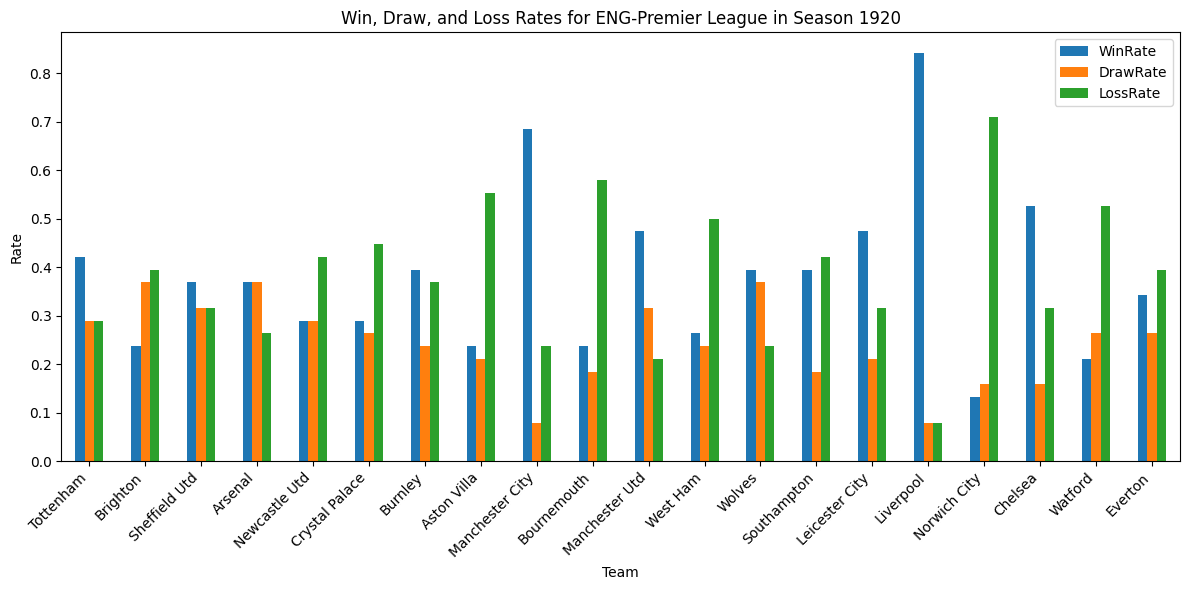

In [ ]:
season_input = input("Enter the season (YY-YY) e.g., 1920: ")
league_input = input("Enter the league name (e.g., ENG-Premier League): ")

plot_rates(season_input, league_input)

Enter the season (YYYY): 1920
Enter the team name: Nice


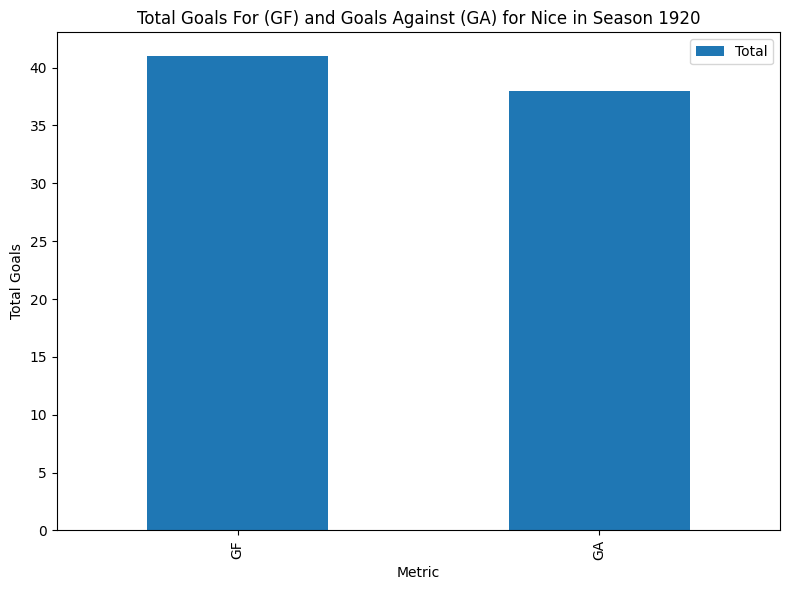

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("FootballData").getOrCreate()

def plot_ga_gf(season, team):

    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    total_gf = filtered_df.selectExpr("sum(GF) as total_gf").first()["total_gf"]
    total_ga = filtered_df.selectExpr("sum(GA) as total_ga").first()["total_ga"]

    pandas_df = pd.DataFrame({"Metric": ["GF", "GA"], "Total": [total_gf, total_ga]})

    fig, ax = plt.subplots(figsize=(8, 6))
    pandas_df.plot(x="Metric", y="Total", kind="bar", ax=ax)
    ax.set_title(f"Total Goals For (GF) and Goals Against (GA) for {team} in Season {season}")
    ax.set_ylabel("Total Goals")
    plt.tight_layout()
    plt.show()

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

plot_ga_gf(season_input, team_input)

Enter the team name: Arsenal


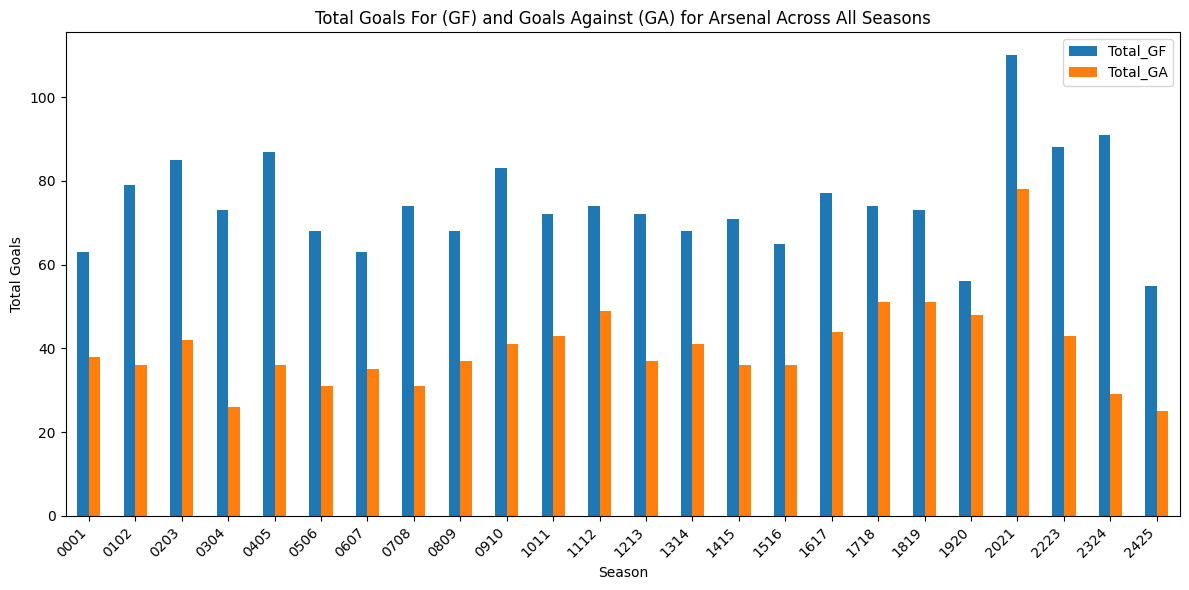

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd


def plot_ga_gf_all_seasons(team):

    filtered_df = last_df.filter(col("Team") == team)

    season_totals_df = filtered_df.groupBy("season").agg(
        sum(col("GF")).alias("Total_GF"),
        sum(col("GA")).alias("Total_GA")
    )

    season_totals_df = season_totals_df.orderBy("season")

    pandas_df = season_totals_df.toPandas()

    fig, ax = plt.subplots(figsize=(12, 6))
    pandas_df.plot(x="season", y=["Total_GF", "Total_GA"], kind="bar", ax=ax)
    ax.set_title(f"Total Goals For (GF) and Goals Against (GA) for {team} Across All Seasons")
    ax.set_ylabel("Total Goals")
    ax.set_xlabel("Season")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

team_input = input("Enter the team name: ")

plot_ga_gf_all_seasons(team_input)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum


def show_standard_stats_totals(season, team):

    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    total_stats = filtered_df.select(
        sum(col("Standard Gls").cast("float")).alias("Total Standard Gls"),
        sum(col("Standard Sh").cast("float")).alias("Total Standard Sh"),
        sum(col("Standard SoT").cast("float")).alias("Total Standard SoT"),
        sum(col("Standard SoT%").cast("float")).alias("Total Standard SoT%"),
        sum(col("Standard G/Sh").cast("float")).alias("Total Standard G/Sh"),
        sum(col("Standard G/SoT").cast("float")).alias("Total Standard G/SoT"),
        sum(col("Standard Dist").cast("float")).alias("Total Standard Dist"),
        sum(col("Standard PK").cast("float")).alias("Total Standard PK"),
        sum(col("Standard PKatt").cast("float")).alias("Total Standard PKatt")
    ).collect()[0]

    for stat_name, stat_value in total_stats.asDict().items():
        print(f"{stat_name}: {stat_value}")

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

show_standard_stats_totals(season_input, team_input)

Enter the season (YYYY): 1920
Enter the team name: Arsenal
Total Standard Gls: 56.0
Total Standard Sh: 403.0
Total Standard SoT: 146.0
Total Standard SoT%: 1425.0999956130981
Total Standard G/Sh: 6.060000043362379
Total Standard G/SoT: 13.56000004708767
Total Standard Dist: 615.1999969482422
Total Standard PK: 3.0
Total Standard PKatt: 3.0


Enter the season (YYYY): 1920
Enter the team name: Arsenal


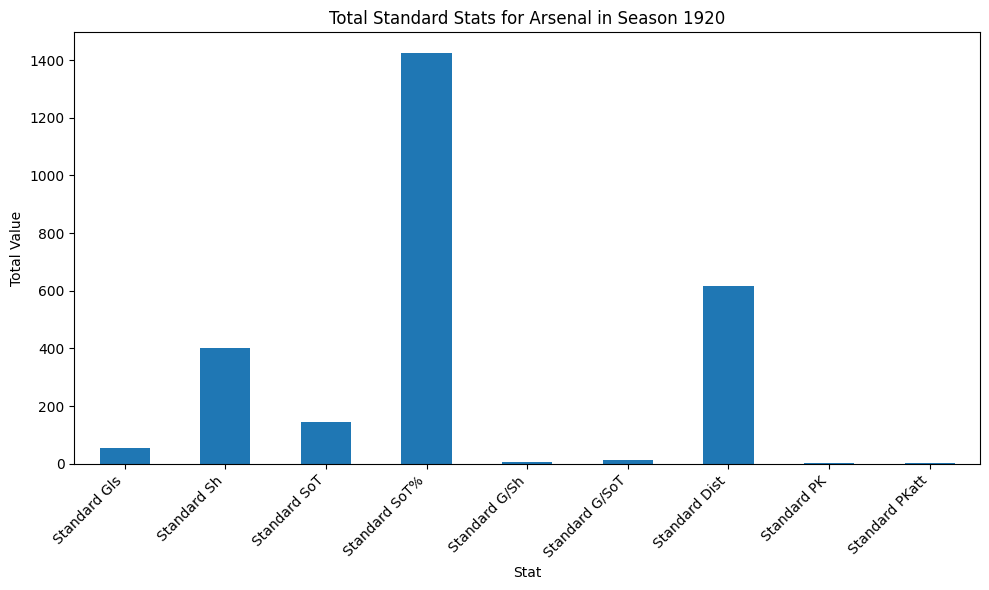

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd

def plot_standard_stats(season, team):
    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    pandas_df = filtered_df.select(
        col("Standard Gls").cast("float"),
        col("Standard Sh").cast("float"),
        col("Standard SoT").cast("float"),
        col("Standard SoT%").cast("float"),
        col("Standard G/Sh").cast("float"),
        col("Standard G/SoT").cast("float"),
        col("Standard Dist").cast("float"),
        col("Standard PK").cast("float"),
        col("Standard PKatt").cast("float")
    ).toPandas()

    total_stats = pandas_df.sum()

    fig, ax = plt.subplots(figsize=(10, 6))
    total_stats.plot(kind="bar", ax=ax)
    ax.set_title(f"Total Standard Stats for {team} in Season {season}")
    ax.set_ylabel("Total Value")
    ax.set_xlabel("Stat")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

plot_standard_stats(season_input, team_input)

Enter the season (YYYY): 1920
Enter the team name: Arsenal


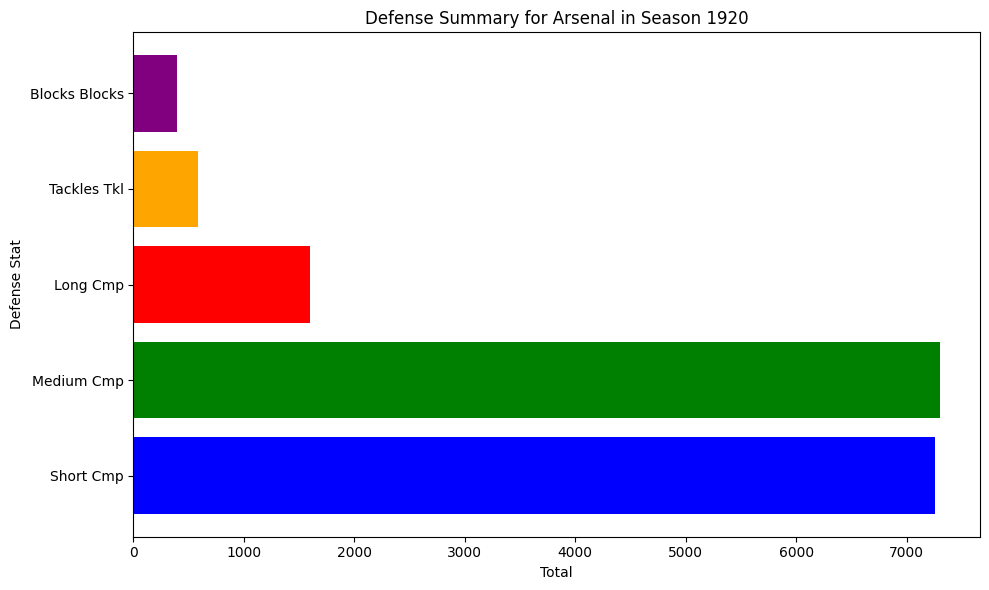

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd

def defense_summary(season, team):

    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    cmp_totals = filtered_df.select(
        sum(col("Short Cmp").cast("float")).alias("Short Cmp"),
        sum(col("Medium Cmp").cast("float")).alias("Medium Cmp"),
        sum(col("Long Cmp").cast("float")).alias("Long Cmp")
    ).collect()[0].asDict()

    tackles_total = filtered_df.select(sum(col("Tackles Tkl").cast("float"))).collect()[0][0]
    blocks_total = filtered_df.select(sum(col("Blocks Blocks").cast("float"))).collect()[0][0]

    all_totals = {**cmp_totals, "Tackles Tkl": tackles_total, "Blocks Blocks": blocks_total}

    df_plot = pd.DataFrame.from_dict(all_totals, orient='index', columns=['Total'])

    plt.figure(figsize=(10, 6))
    plt.barh(df_plot.index, df_plot['Total'], color=['blue', 'green', 'red', 'orange', 'purple'])
    plt.title(f"Defense Summary for {team} in Season {season}")
    plt.xlabel("Total")
    plt.ylabel("Defense Stat")
    plt.tight_layout()
    plt.show()

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

defense_summary(season_input, team_input)

Enter the season (YYYY): 1920
Enter the team name: Arsenal


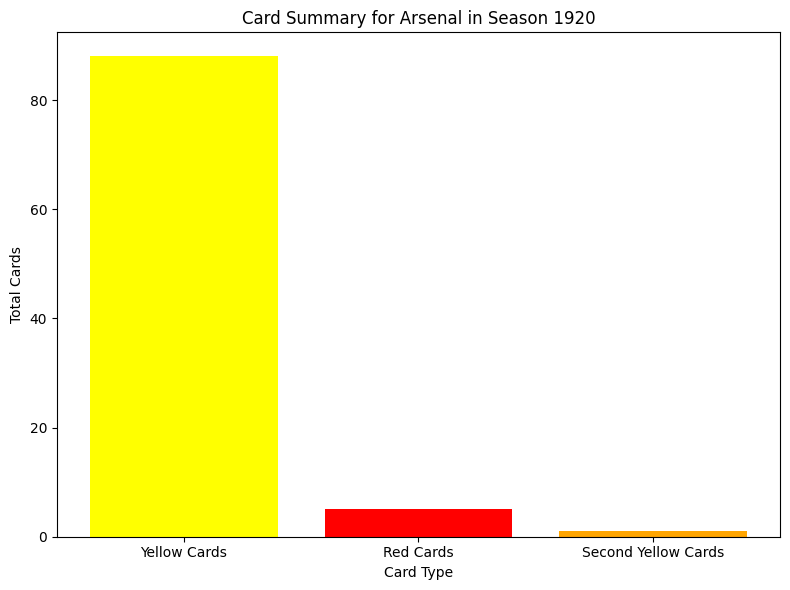

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd


def card_summary(season, team):

    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    card_totals = filtered_df.select(
        sum(col("Performance CrdY").cast("float")).alias("Yellow Cards"),
        sum(col("Performance CrdR").cast("float")).alias("Red Cards"),
        sum(col("Performance 2CrdY").cast("float")).alias("Second Yellow Cards")
    ).collect()[0].asDict()

    df_plot = pd.DataFrame.from_dict(card_totals, orient='index', columns=['Total'])

    plt.figure(figsize=(8, 6))
    plt.bar(df_plot.index, df_plot['Total'], color=['yellow', 'red', 'orange'])
    plt.title(f"Card Summary for {team} in Season {season}")
    plt.ylabel("Total Cards")
    plt.xlabel("Card Type")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

card_summary(season_input, team_input)

Enter the season (YYYY): 1920
Enter the team name: Arsenal


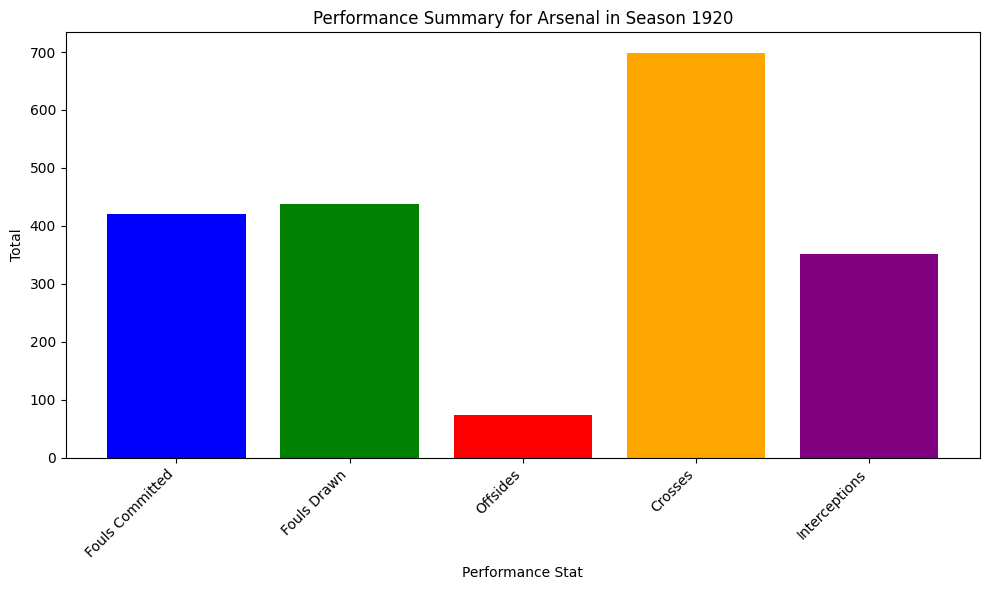

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import pandas as pd

def performance_summary(season, team):

    filtered_df = last_df.filter((col("season") == season) & (col("Team") == team))

    performance_totals = filtered_df.select(
        sum(col("Performance Fls").cast("float")).alias("Fouls Committed"),
        sum(col("Performance Fld").cast("float")).alias("Fouls Drawn"),
        sum(col("Performance Off").cast("float")).alias("Offsides"),
        sum(col("Performance Crs").cast("float")).alias("Crosses"),
        sum(col("Performance Int").cast("float")).alias("Interceptions")
    ).collect()[0].asDict()

    df_plot = pd.DataFrame.from_dict(performance_totals, orient='index', columns=['Total'])

    plt.figure(figsize=(10, 6))
    plt.bar(df_plot.index, df_plot['Total'], color=['blue', 'green', 'red', 'orange', 'purple'])
    plt.title(f"Performance Summary for {team} in Season {season}")
    plt.ylabel("Total")
    plt.xlabel("Performance Stat")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

season_input = input("Enter the season (YYYY): ")
team_input = input("Enter the team name: ")

performance_summary(season_input, team_input)

Enter the season (YYYY): 1920
Enter the league name (e.g., ENG-Premier League): ENG-Premier League
Enter the team name: Arsenal


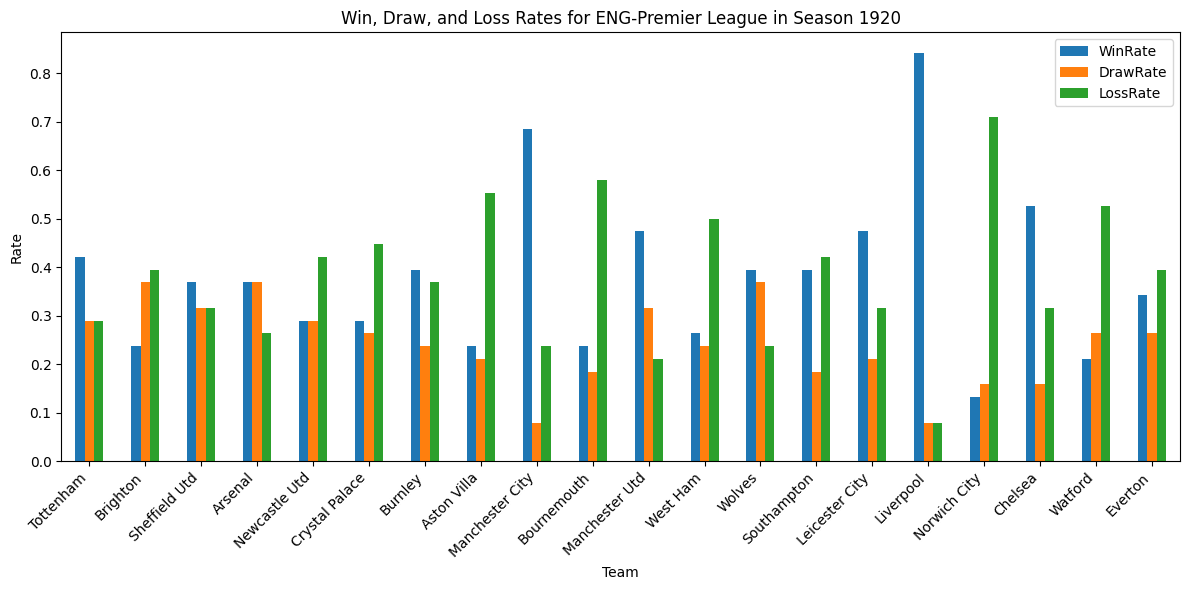

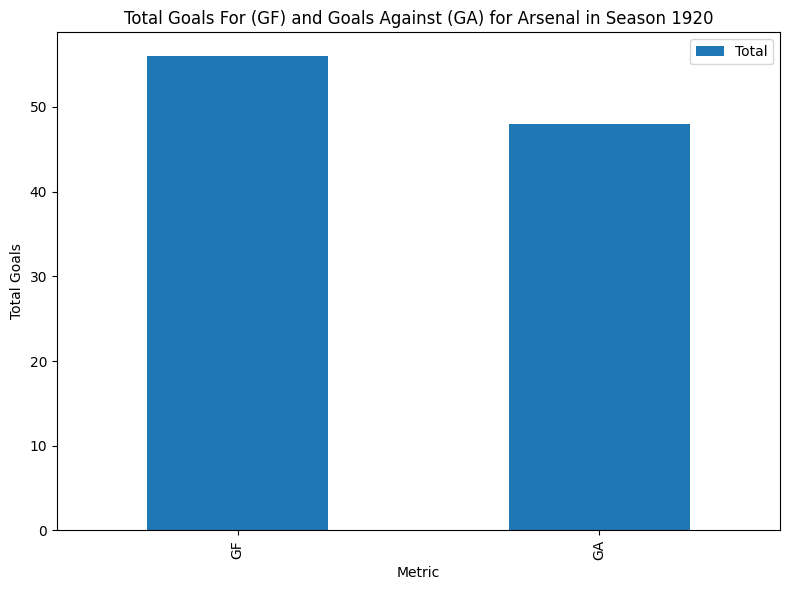

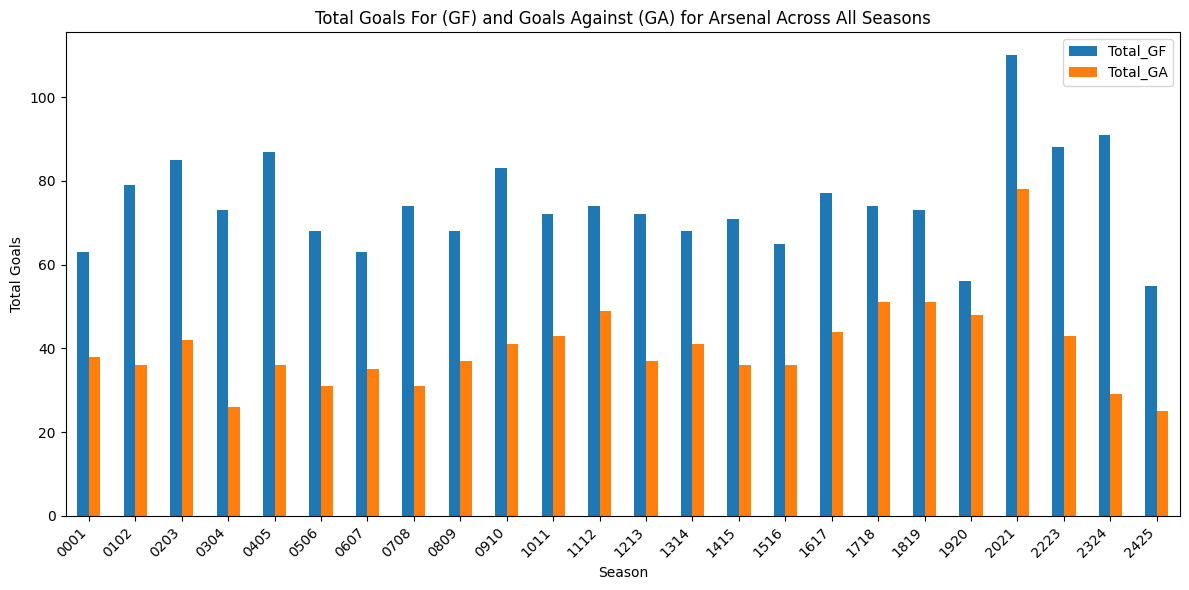

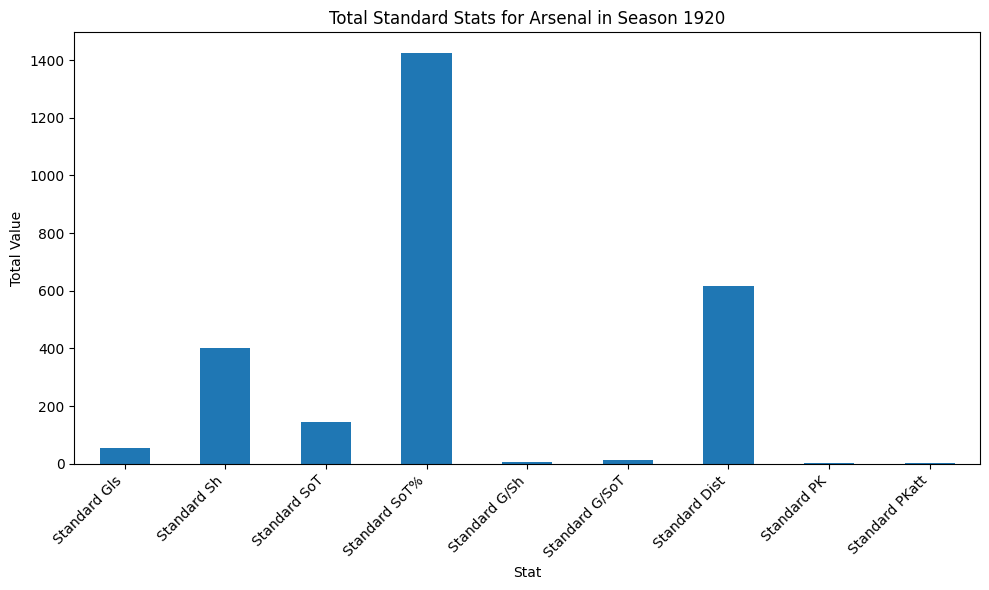

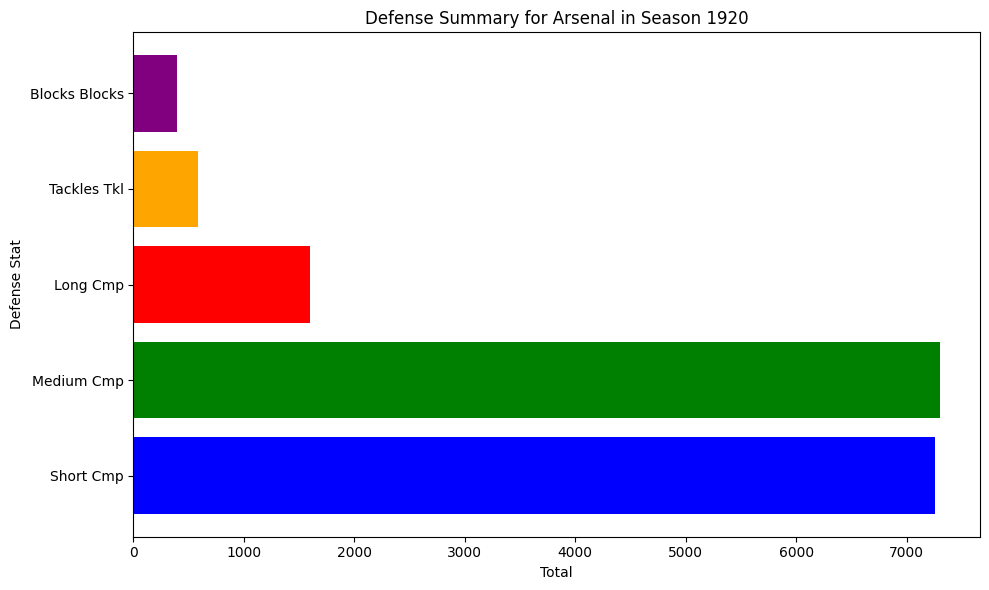

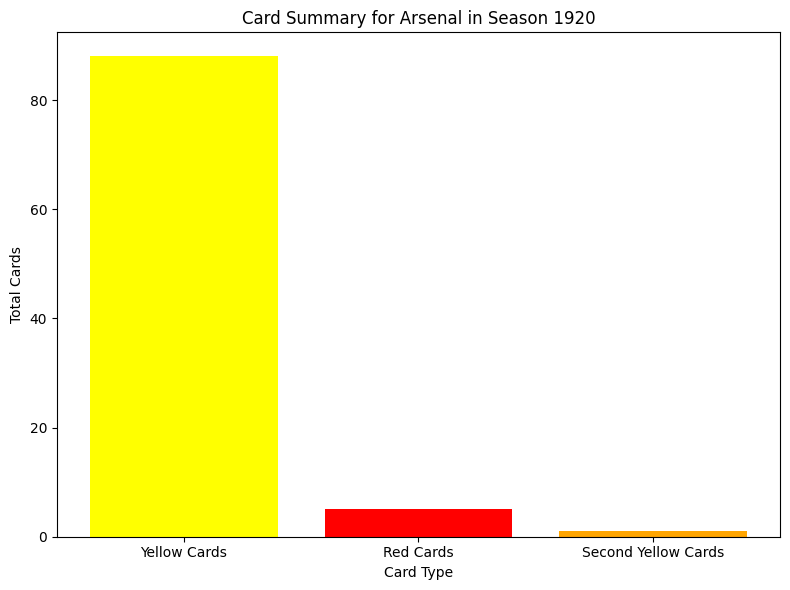

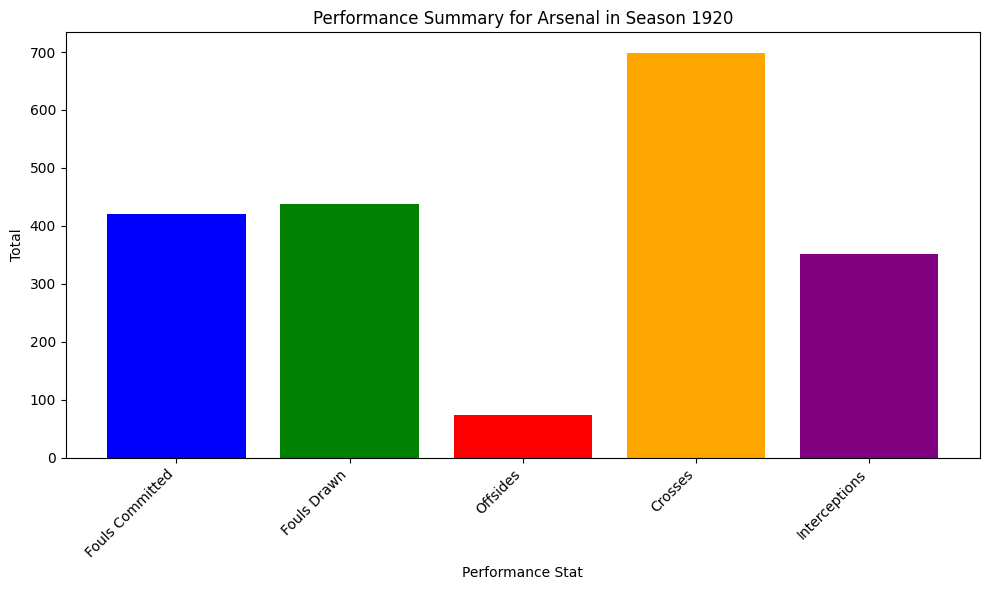

In [ ]:
season_input = input("Enter the season (YYYY): ")
league_input = input("Enter the league name (e.g., ENG-Premier League): ")
team_input = input("Enter the team name: ")
def summary_of_team (season, league, team):
    plot_rates(season, league)
    plot_ga_gf(season, team)
    plot_ga_gf_all_seasons(team)
    plot_standard_stats(season, team)
    defense_summary(season, team)
    card_summary(season, team)
    performance_summary(season, team)
summary_of_team(season_input, league_input, team_input)

In [ ]:
def get_match_result(team_name, opponent_name):

  filtered_df = last_df.filter(
      (col("Team") == team_name) & (col("opponent") == opponent_name)
  )

  return filtered_df

team_input = input("Enter the team name: ")
opponent_input = input("Enter the opponent name: ")

match_result_df = get_match_result(team_input, opponent_input)

if match_result_df.count() > 0:
  print("\nMatch Details:")
  match_result_df.select("date", "Team", "opponent", "result", "GF", "GA").show()
else:
  print("No match found between the specified teams.")

Enter the team name: Arsenal
Enter the opponent name: Tottenham

Match Details:
+----------+-------+---------+------+---+---+
|      date|   Team| opponent|result| GF| GA|
+----------+-------+---------+------+---+---+
|2002-04-06|Arsenal|Tottenham|     W|  2|  1|
|2002-11-16|Arsenal|Tottenham|     W|  3|  0|
|2005-04-25|Arsenal|Tottenham|     W|  1|  0|
|2005-10-29|Arsenal|Tottenham|     D|  1|  1|
|2006-04-22|Arsenal|Tottenham|     D|  1|  1|
|2006-12-02|Arsenal|Tottenham|     W|  3|  0|
|2007-04-21|Arsenal|Tottenham|     D|  2|  2|
|2007-09-15|Arsenal|Tottenham|     W|  3|  1|
|2009-02-08|Arsenal|Tottenham|     D|  0|  0|
|2009-10-31|Arsenal|Tottenham|     W|  3|  0|
|2010-11-20|Arsenal|Tottenham|     L|  2|  3|
|2012-11-17|Arsenal|Tottenham|     W|  5|  2|
|2014-03-16|Arsenal|Tottenham|     W|  1|  0|
|2014-09-27|Arsenal|Tottenham|     D|  1|  1|
|2015-11-08|Arsenal|Tottenham|     D|  1|  1|
|2016-11-06|Arsenal|Tottenham|     D|  1|  1|
|2017-04-30|Arsenal|Tottenham|     L|  0|  2|


In [ ]:
from IPython.display import display
from pyspark.sql.functions import col

def get_match_result(team_name, opponent_name):

  filtered_df = last_df.filter(
      (col("Team") == team_name) & (col("opponent") == opponent_name)
  )

  return filtered_df

team_input = input("Enter the team name: ")
opponent_input = input("Enter the opponent name: ")

match_result_df = get_match_result(team_input, opponent_input)

if match_result_df.count() > 0:
    pandas_df = match_result_df.select("date", "Team", "opponent", "result", "GF", "GA").toPandas()

    display(pandas_df)
else:
    print("No match found between the specified teams.")

Enter the team name: Arsenal
Enter the opponent name: Tottenham


,date,Team,opponent,result,GF,GA
0,2002-04-06,Arsenal,Tottenham,W,2,1
1,2002-11-16,Arsenal,Tottenham,W,3,0
2,2005-04-25,Arsenal,Tottenham,W,1,0
3,2005-10-29,Arsenal,Tottenham,D,1,1
4,2006-04-22,Arsenal,Tottenham,D,1,1
5,2006-12-02,Arsenal,Tottenham,W,3,0
6,2007-04-21,Arsenal,Tottenham,D,2,2
7,2007-09-15,Arsenal,Tottenham,W,3,1
8,2009-02-08,Arsenal,Tottenham,D,0,0
9,2009-10-31,Arsenal,Tottenham,W,3,0
